In [1]:
%pylab inline
from scipy.optimize import curve_fit
#from scipy.constants import *

Populating the interactive namespace from numpy and matplotlib


In [5]:
U = []
for i in range(21):
    U.append(0.5 + i*0.1)
    
U = array(U)
N1 = array([139, 81, 124, 206, 36, 25, 42, 26, 26, 25, 30, 10, 13, 16, 31, 46, 5, 10, 13, 3, 2])
N2 = array([144, 77, 86, 323, 88, 42, 32, 31, 29, 25, 33, 24, 15, 10, 16, 40, 21, 11, 10, 10, 2])
Nk = array([0, 0, 4, 47, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [22]:
N1err = []
for i in range(len(N1)):
    N1err.append(max(sqrt(N1[i]), 1))
N1err = array(N1err)

N2err = []
for j in range(len(N2)):
    N2err.append(max(sqrt(N2[j]), 1))
N2err = array(N2err)

Nkerr = []
for k in range(len(Nk)):
    Nkerr.append(max(sqrt(Nk[k]), 1))
Nkerr = array(Nkerr)

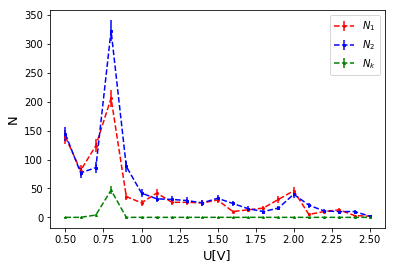

In [52]:
errorbar(U, N1, yerr = N1err, marker = 'o', mfc = 'red', mec = 'red', ms = 2, ecolor = 'red', linestyle = '--', color = 'red', label = r'$N_1$')
errorbar(U, N2, yerr = N2err, marker = 's', mfc = 'blue', mec = 'blue', ms = 2, ecolor = 'blue', linestyle = '--', color = 'blue', label = r'$N_2$')
errorbar(U, Nk, yerr = Nkerr, marker = '^', mfc = 'green', mec = 'green', ms = 2, ecolor = 'green', linestyle = '--', color = 'green', label = r'$N_k$')
xlabel('U[V]', fontsize = 13)
ylabel('N', fontsize = 13)
legend()

savefig('Na-spekt.png')

In [15]:
phi = array([130, 140, 150, 160, 170, 175, 180, 185, 190, 200, 210, 220])
koin = array([0, 0, 0, 0, 22, 45, 65, 51, 31, 2, 0, 0])

In [33]:
koinerr = []
for i in range(len(koin)):
    koinerr.append(max(sqrt(koin[i]), 1))
koinerr = array(koinerr)

In [37]:
def gauss(x, a, mu, sigma):
    return a * exp(-(x - mu)**2 / (2*sigma**2))

def illeszt(f, x, y, hiba):
    popt,pcov=curve_fit(f, x, y, sigma=hiba) # az illesztés elvégzése
    perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
    print(popt, '+-', perr)
    return popt, perr

In [42]:
popt, pcov = curve_fit(gauss, phi, koin, sigma = koinerr, p0 = [1, 180, 20])
perr = sqrt(diag(pcov))
print('mu: ', popt[1], '+-', perr[1])

$\mu$:  180.96129170659208 +- 0.22965788710876178


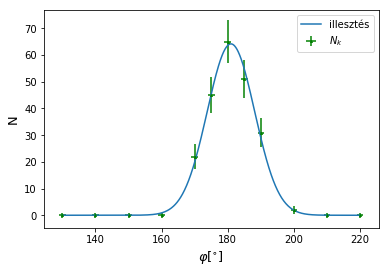

In [41]:
x = linspace(130, 220, 1000)

plot(x, gauss(x, *popt), label = 'illesztés')
errorbar(phi, koin, xerr = 1, yerr = koinerr, marker = '^', mfc = 'green', mec = 'green', ms = 2, ecolor = 'green', linestyle = '', label = r'$N_k$')
xlabel(r'$\varphi [^{\circ}]$', fontsize = 13)
ylabel('N', fontsize = 13)
legend()

savefig('Na_szog.png')

In [43]:
V = []
for i in range(10):
    V.append(1.5 + i*0.1)
V = array(V)
N1Co = array([75, 74, 70, 171, 85, 74, 103, 25, 13, 3])
N2Co = array([102, 77, 74, 126, 156, 57, 110, 99, 17, 3])

In [44]:
N1Coerr = []
for i in range(len(N1Co)):
    N1Coerr.append(max(sqrt(N1Co[i]), 1))
N1Coerr = array(N1Coerr)

N2Coerr = []
for i in range(len(N2Co)):
    N2Coerr.append(max(sqrt(N2Co[i]), 1))
N2Coerr = array(N2Coerr)

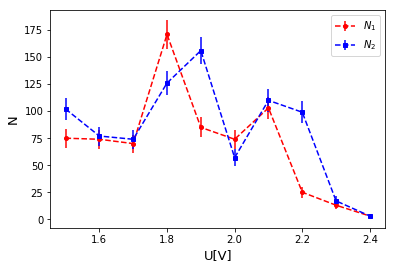

In [51]:
errorbar(V, N1Co, yerr = N1Coerr, marker = 'o', mfc = 'red', mec = 'red', ms = 4, ecolor = 'red', linestyle = '--', color = 'red', label = r'$N_1$')
errorbar(V, N2Co, yerr = N2Coerr, marker = 's', mfc = 'blue', mec = 'blue', ms = 4, ecolor = 'blue', linestyle = '--', color = 'blue', label = r'$N_2$')
xlabel('U[V]', fontsize = 13)
ylabel('N', fontsize = 13)
legend()

savefig('Co_spekt.png')